# Projeto - Análise Preditiva Renda Anual

Nesse script o objetivo será fazer uma análise preditiva com dados de pessoas que tiveram ou não diabetes usando um modelo de regressão logística. Com base nos sintomas apresentados, o modelo poderá fazer uma previsão aproximada se a pessoa terá ou não diabates. O objetivo do modelo é ter uma acurácia acima de 80% pelo menos.

In [1]:
# carregando os pacotes e removendo os avisos
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Carregando os datasets de treino e teste
df_1 = pd.read_csv('python_scripts/income_predict/adult_train.csv')
df_2 = pd.read_csv('python_scripts/income_predict/adult_test.csv')

In [3]:
# Combinando os datasets para o pré-processamento de dados
df_full = df_1.append(df_2)

In [4]:
# Conferindo a quantidade de linhas e confirmando que a junção dos dataset está correta
print(df_1.shape, df_2.shape, df_full.shape)

(32561, 15) (16281, 15) (48842, 15)


## Dicionário de Dados

Neste seção do Jupyter Notebook, será registrado o dicionário de dados do dataset utilizado nesse projeto. O dataset foi feito com base em uma pesquisa de renda anual de pessoas que residem nos E.U.A no ano de 1996. Os dados foram disponibilizados no repositório de Machine Learning da UCI.



Atributos listados

> Variável target:
- >50K, <=50K.

> Variáveis preditoras:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Etapa 1 - Análise Exploratória dos Dados

Neste capítulo será feito uma análise exploratória dos dados para analisar insights que podem ser importantes nas próximas etapas da análise.

In [18]:
# Ajuste no label da variável target
df_full = df_full.replace(to_replace = [' >50K',' <=50K'], value = [1,0])
df_full = df_full.replace(to_replace = [' >50K.',' <=50K.'], value = [1,0])
df_full[' income'].unique()

array([0, 1], dtype=int64)

In [19]:
# Visualizando os dados
df_full.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [20]:
# Verificar se o dataset tem valores nulos.
# Não há valores nulos, mas sabemos temos valores nulos com outros caracteres ("?") conforme informado
df_full.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [21]:
# Tipos de dados
df_full.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income             int64
dtype: object

Text(0.5,1,'Histograma - Idade')

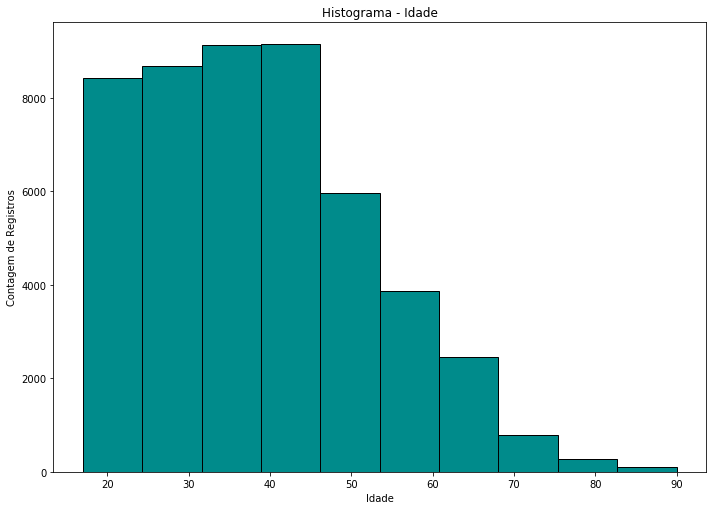

In [45]:
# Ao analisar o histograma das idades, vemos que a distribuição parece seguir uma normal. 
# Contudo, como temos mais de uma variável numérica será necessário padronizar os dados

fig, ax = plt.subplots(figsize=(11.7, 8.27))
plt.hist(df_full['age'], color = 'darkcyan', edgecolor = 'black')
plt.ylabel('Contagem de Registros')
plt.xlabel('Idade')
plt.title('Histograma - Idade')

Text(0.5,1,'Histograma - Quantidades Pessoas que Responderam a Pesquisa')

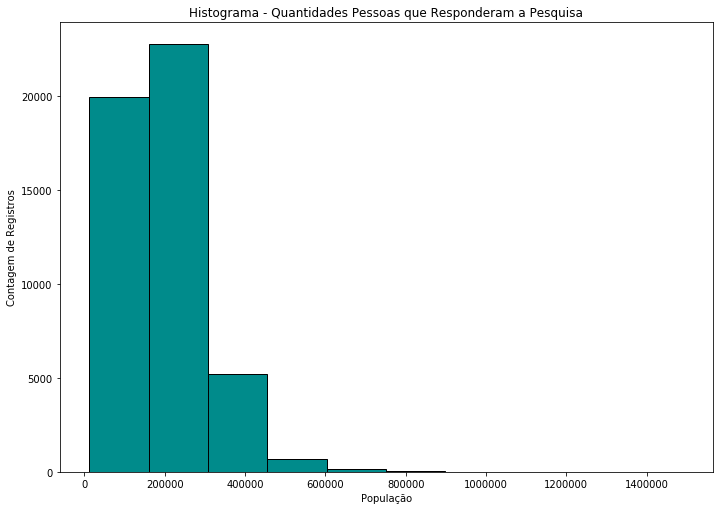

In [44]:
# O registro mais frequente é em torno de 200.000 pessoas respondendo a pesquisa.

fig, ax = plt.subplots(figsize=(11.7, 8.27))
plt.hist(df_full[' fnlwgt'], color = 'darkcyan', edgecolor = 'black')
plt.ylabel('Contagem de Registros')
plt.xlabel('População')
plt.title('Histograma - Quantidades Pessoas que Responderam a Pesquisa')

Text(0.5,1,'Histograma - Horas por Semana')

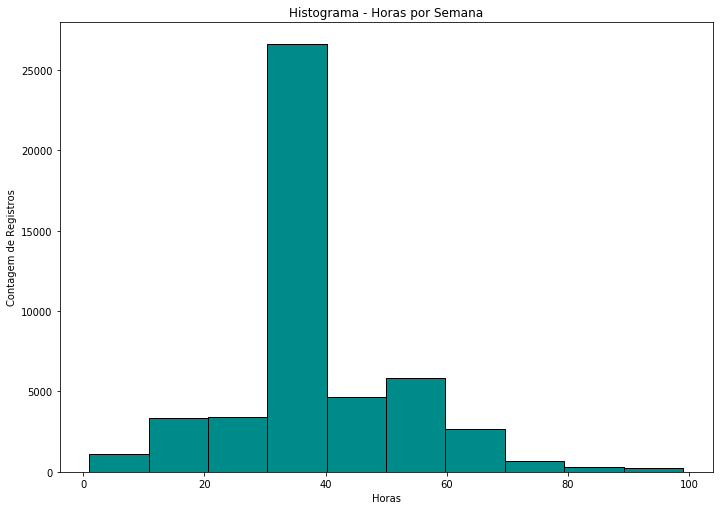

In [43]:
# No gráfico de horas por semans, temos a maioria dos registros em torno de 40Hrs por semana
# O que é esperado para a maioria da população

fig, ax = plt.subplots(figsize=(11.7, 8.27))
plt.hist(df_full[' hours-per-week'], color = 'darkcyan', edgecolor = 'black')
plt.ylabel('Contagem de Registros')
plt.xlabel('Horas')
plt.title('Histograma - Horas por Semana')

Text(0.5,1,'Distribuição Renda por Genêro')

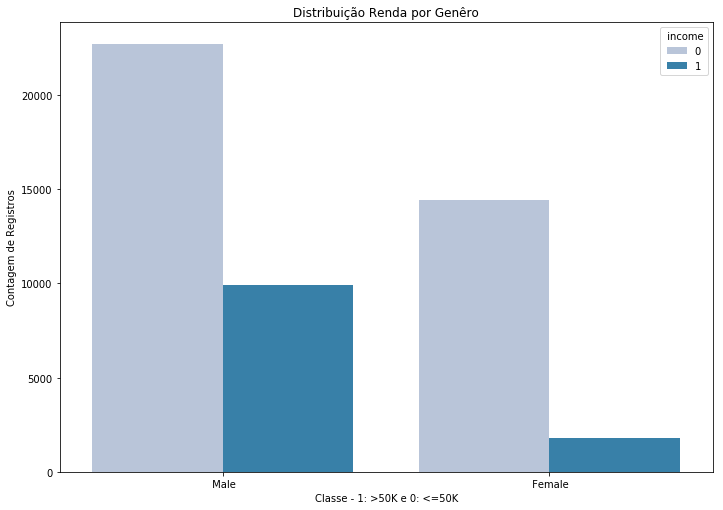

In [42]:
# No gráfico de barras, vemos que temos mais homens com renda superior a 50K por mês do que mulheres.
# A própria classe genêro não está totalmente balanceada com mais homens do que mulheres.

fig, ax = plt.subplots(figsize=(11.7, 8.27))
graf_class = sns.countplot(x = ' sex', data = df_full, palette = 'PuBu', hue = ' income', orient = 'H')
graf_class.set_xlabel('Classe - 1: >50K e 0: <=50K')
graf_class.set_ylabel('Contagem de Registros')
graf_class.set_title('Distribuição Renda por Genêro')

Text(0.5,1,'Distribuição Renda por Genêro')

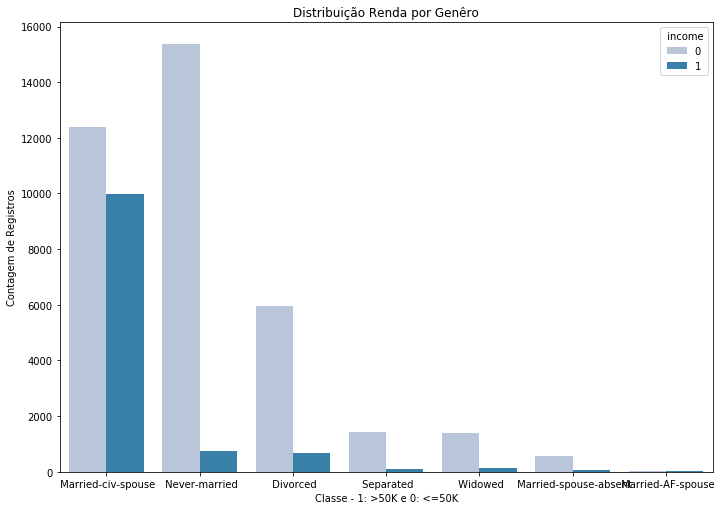

In [53]:
# No gráfico vemos que a pessoas com renda superior a 50K/mês estão mais concentradas nos casados.

fig, ax = plt.subplots(figsize=(11.7, 8.27))
graf_class = sns.countplot(x = ' marital-status', 
                           data = df_full, 
                           palette = 'PuBu', 
                           hue = ' income',
                          order=df_full[' marital-status'].value_counts().index)
graf_class.set_xlabel('Classe - 1: >50K e 0: <=50K')
graf_class.set_ylabel('Contagem de Registros')
graf_class.set_title('Distribuição Renda por Genêro')

Text(0.5,1,'Distribuição Renda por Escolaridade')

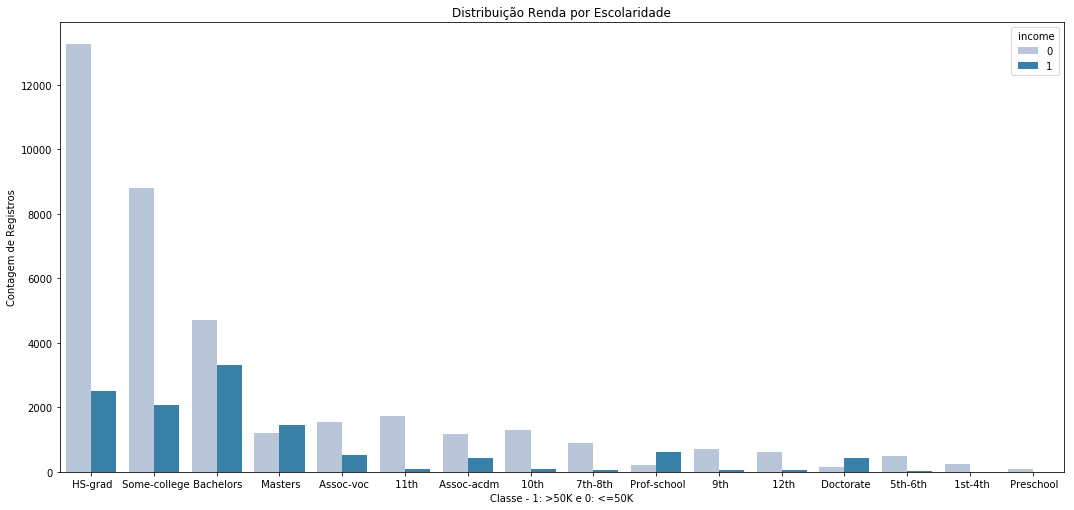

In [50]:
# No gráfico é possível observar que quanto maior a escolaridade, a tendência é ter uma renda maior.

fig, ax = plt.subplots(figsize=(18.0, 8.27))
graf_class = sns.countplot(x = ' education', 
                           data = df_full, 
                           palette = 'PuBu', 
                           hue = ' income', 
                           order=df_full[' education'].value_counts().index)
graf_class.set_xlabel('Classe - 1: >50K e 0: <=50K')
graf_class.set_ylabel('Contagem de Registros')
graf_class.set_title('Distribuição Renda por Escolaridade')
